In [52]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
from konlpy.tag import Okt
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
len(movie_reviews.fileids())

2000

In [3]:
movie_reviews.fileids()[:10]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt']

In [5]:
fileid = movie_reviews.fileids()[0]
print(movie_reviews.raw(fileid)[:200])

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w


In [7]:
print(movie_reviews.sents(fileid)[:2])

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]


In [8]:
print(movie_reviews.words(fileid)[:20])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']


In [13]:
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
len(reviews)

2000

In [12]:
cv = CountVectorizer()
cv

CountVectorizer()

In [22]:
reviews_cv = cv.fit(reviews)
reviews_cv = reviews_cv.transform(reviews)

In [23]:
cv.get_feature_names_out()

array(['00', '000', '0009f', ..., 'zwigoff', 'zycie', 'zzzzzzz'],
      dtype=object)

In [24]:
type(reviews_cv)

scipy.sparse.csr.csr_matrix

In [25]:
for word, count in zip(cv.get_feature_names_out()[:20], reviews_cv[0].toarray()[0, :20]):
    print(f'{word}:{count}', end=', ')

00:0, 000:0, 0009f:0, 007:0, 00s:0, 03:0, 04:0, 05:0, 05425:0, 10:10, 100:0, 1000:0, 10000:0, 100m:0, 101:0, 102:0, 103:0, 104:0, 105:0, 106:0, 

In [27]:
df = pd.read_csv('./data/daum_movie_review.csv')
df.head(10)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워
5,나는 재밌게 봄,10,2018.10.14,인피니티 워
6,0.5점은 줄 수 없냐?,0,2018.10.10,인피니티 워
7,헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...,10,2018.10.08,인피니티 워
8,충격 결말,9,2018.10.06,인피니티 워
9,응집력,8,2018.10.05,인피니티 워


In [29]:
tag = Okt()

In [30]:
tag.morphs(df.review[1])

['몰입',
 '할수밖에',
 '없다',
 '.',
 '어렵게',
 '생각',
 '할',
 '필요없다',
 '.',
 '내',
 '가',
 '전투',
 '에',
 '참여',
 '한',
 '듯',
 '손',
 '에',
 '땀',
 '이남',
 '.']

In [31]:
tag.nouns(df.review[1])

['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']

In [32]:
tag.pos(df.review[1])

[('몰입', 'Noun'),
 ('할수밖에', 'Verb'),
 ('없다', 'Adjective'),
 ('.', 'Punctuation'),
 ('어렵게', 'Adjective'),
 ('생각', 'Noun'),
 ('할', 'Verb'),
 ('필요없다', 'Adjective'),
 ('.', 'Punctuation'),
 ('내', 'Noun'),
 ('가', 'Josa'),
 ('전투', 'Noun'),
 ('에', 'Josa'),
 ('참여', 'Noun'),
 ('한', 'Determiner'),
 ('듯', 'Noun'),
 ('손', 'Noun'),
 ('에', 'Josa'),
 ('땀', 'Noun'),
 ('이남', 'Noun'),
 ('.', 'Punctuation')]

In [33]:
def my_tokenizer(doc):
    return [token for token, pos in tag.pos(doc) if pos in ['Noun', 'Verb', 'Adjective']]

In [34]:
my_tokenizer(df.review[1])

['몰입',
 '할수밖에',
 '없다',
 '어렵게',
 '생각',
 '할',
 '필요없다',
 '내',
 '전투',
 '참여',
 '듯',
 '손',
 '땀',
 '이남']

In [35]:
daum_cv = CountVectorizer(tokenizer=my_tokenizer)

In [36]:
daum_DTM = daum_cv.fit_transform(df.review)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [37]:
daum_cv.get_feature_names_out()[:100]

array(['가', '가가', '가감', '가게', '가겠고만', '가겠구나', '가겠네', '가겠다', '가겠다고',
       '가겠지만', '가격', '가고', '가고싶을', '가관', '가급', '가기', '가기전에', '가긴', '가길',
       '가길래', '가까', '가까우니', '가까운', '가까운거', '가까이', '가깝게', '가깝다', '가깝다는',
       '가깝습니다', '가깝지만', '가끔', '가나', '가난', '가난하게', '가난한', '가난해서', '가난했고',
       '가네', '가네요', '가녀린', '가는', '가는가', '가는거', '가는건데', '가는걸', '가는것은',
       '가는게', '가는길', '가는데', '가는데로', '가는데마다', '가는줄', '가는줄도', '가는지', '가는지도',
       '가늠', '가능', '가능성', '가능하겠다', '가능하고', '가능하구나', '가능하네요', '가능하다',
       '가능하다는게', '가능하였기에', '가능하지', '가능하지만', '가능한', '가능한지', '가능할', '가능할꺼라',
       '가능할지', '가능해서', '가능했고', '가능했네요', '가능했다고', '가능했던', '가능했던것', '가능했울듯',
       '가능했을걸', '가니', '가다', '가다가', '가다니', '가담', '가더', '가더군요', '가더라',
       '가더라는', '가더이다', '가던', '가던가', '가던데요', '가도', '가동', '가둬라', '가득',
       '가득하고', '가득하다', '가득한'], dtype=object)

In [39]:
mpl.rcParams['axes.unicode_minus'] = False

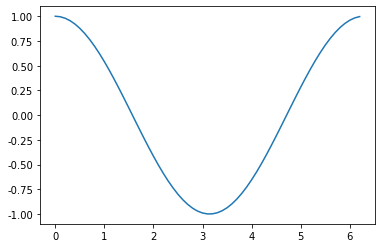

In [41]:
x = np.arange(0, 2*np.pi, 0.1)
y = np.cos(x)
plt.plot(x, y)
plt.show()

In [43]:
start = len(reviews[0]) // 2
source = reviews[0][-start:]

In [47]:
source_cv = cv.transform([source])
source_cv.shape

(1, 39659)

In [48]:
sim_result = cosine_similarity(source_cv, reviews_cv)
sorted(sim_result[0], reverse=True)[:10]

[0.9322201143731197,
 0.8061922285617775,
 0.8026995736973769,
 0.8004192626861433,
 0.7997973969833971,
 0.7975888378628838,
 0.7893602320919967,
 0.7874231932342122,
 0.7865952075401962,
 0.7863099416579395]

In [49]:
np.argmax(sim_result[0])

0

In [51]:
(-sim_result[0]).argsort()[:10]

array([   0, 1501,  126, 1846,  100, 1560, 1570,    9,  138,  788],
      dtype=int64)

In [53]:
trans = TfidfTransformer()
reviews_tfidf = trans.fit_transform(reviews_cv)

In [54]:
reviews_tfidf[0].toarray()[0][:20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.30081193,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])